In [12]:
from keras.datasets import imdb
from keras import preprocessing

In [13]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [14]:
len(train_data)

25000

In [15]:
train_labels[0]

1

In [16]:
maximum = max([max(x) for x in train_data])
maximum

9999

In [6]:
word_index = imdb.get_word_index()

reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

In [7]:
decoded_review = ' '.join([reverse_word_index.get(i-3, '?') for i in train_data[1]])
decoded_review

"? big hair big boobs bad music and a giant safety pin these are the words to best describe this terrible movie i love cheesy horror movies and i've seen hundreds but this had got to be on of the worst ever made the plot is paper thin and ridiculous the acting is an abomination the script is completely laughable the best is the end showdown with the cop and how he worked out who the killer is it's just so damn terribly written the clothes are sickening and funny in equal ? the hair is big lots of boobs ? men wear those cut ? shirts that show off their ? sickening that men actually wore them and the music is just ? trash that plays over and over again in almost every scene there is trashy music boobs and ? taking away bodies and the gym still doesn't close for ? all joking aside this is a truly bad film whose only charm is to look back on the disaster that was the 80's and have a good old laugh at how bad everything was back then"

In [17]:
import numpy as np

In [9]:
def vectorize_sequences(sequences, dimension=10000) :
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences) :
        results[i, sequence] = 1
    return results

In [9]:
train_data = vectorize_sequences(train_data)
test_data = vectorize_sequences(test_data)

KeyboardInterrupt: 

In [18]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [19]:
train_data.shape

(25000,)

In [29]:
train_labels.shape

(25000,)

In [20]:
train_labels = np.asarray(train_labels).astype('float32')
test_labels = np.asarray(test_labels).astype('float32')

In [21]:
from keras import models
from keras import layers

In [ ]:
model = models.Sequential()

model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
validation_data = train_data[:10000]
validation_labels = train_labels[:10000]
partial_train_data = train_data[10000:]
partial_train_labels = train_labels[10000:]

In [ ]:
history = model.fit(partial_train_data, partial_train_labels, epochs=10,batch_size=256, validation_data=(validation_data,validation_labels))

In [ ]:
history_dict = history.history

In [ ]:
history_dict.keys()

In [ ]:
import matplotlib.pyplot as plt

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(history_dict['accuracy']) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs, history_dict['accuracy'], 'bo', label='Training accuracy')
plt.plot(epochs, history_dict['val_accuracy'], 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['accuracy'])
model.fit(train_data, train_labels, epochs=4, batch_size=512)


In [ ]:
results = model.evaluate(test_data, test_labels)
results

In [ ]:
model.predict(test_data)

In [ ]:
model2 = models.Sequential()

model2.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model2.add(layers.Dense(64, activation='relu'))
model2.add(layers.Dense(46, activation='softmax'))

In [ ]:
model2.summary()

In [57]:
train_data.shape

(25000,)

In [58]:
x_train = preprocessing.sequence.pad_sequences(train_data, maxlen=20)
x_test = preprocessing.sequence.pad_sequences(test_data, maxlen=20)

In [27]:
from keras.models import Sequential
from keras.layers import Flatten, Dense
model = Sequential()
model.add(layers.Embedding(10000, 8, input_length=20))
model.add(layers.Flatten())
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.summary()
history = model.fit(x_train, train_labels,
epochs=10,
batch_size=32,
validation_split=0.2)

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 20, 8)             80000     
_________________________________________________________________
flatten_2 (Flatten)          (None, 160)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 161       
Total params: 80,161
Trainable params: 80,161
Non-trainable params: 0
_________________________________________________________________

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 10s 498us/step - loss: 0.6720 - acc: 0.6148 - val_loss: 0.6310 - val_acc: 0.6874
Epoch 2/10
20000/20000 [==============================] - 8s 388us/step - loss: 0.5531 - acc: 0.7477 - val_loss: 0.5359 - val_acc: 0.7262: 0s - loss: 0.5
Epoch 3/10
20000/20000 [=============

In [59]:
x_train = x_train[:10000]
y_train = train_labels[:10000]

In [60]:
x_train.shape

(10000, 20)

In [38]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

model = Sequential()
model.add(Embedding(10000, 8, input_length=20))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 20, 8)             80000     
_________________________________________________________________
flatten_3 (Flatten)          (None, 160)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 32)                5152      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 33        
Total params: 85,185
Trainable params: 85,185
Non-trainable params: 0
_________________________________________________________________


In [46]:
model = Sequential()

model.add(layers.Embedding(10000,32))
model.add(layers.SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(x_train, y_train,
epochs=3,
batch_size=128,
validation_split=0.2)
model.summary()

Train on 800 samples, validate on 200 samples
Epoch 1/3
800/800 [==============================] - 9s 11ms/step - loss: 0.6958 - acc: 0.4863 - val_loss: 0.6933 - val_acc: 0.5050
Epoch 2/3
800/800 [==============================] - 1s 2ms/step - loss: 0.6035 - acc: 0.7900 - val_loss: 0.7418 - val_acc: 0.5100
Epoch 3/3
800/800 [==============================] - 1s 952us/step - loss: 0.4529 - acc: 0.8413 - val_loss: 0.8297 - val_acc: 0.4600
Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_10 (Embedding)     (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_10 (SimpleRNN)    (None, 32)                2080      
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 33        
Total params: 322,113
Trainable params: 322,113
Non-trainable params: 0
_

In [47]:
model.evaluate(x_test[:2000], test_labels[:2000])

2000/2000 [==============================] - 7s 3ms/step


[0.7796997966766357, 0.5214999914169312]

In [43]:
model = Sequential()

model.add(layers.Embedding(10000,32))
model.add(layers.SimpleRNN(32, return_sequences=True))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(x_train, y_train,
epochs=10,
batch_size=128,
validation_split=0.2)
model.summary()

ValueError: Error when checking target: expected dense_6 to have 3 dimensions, but got array with shape (1000, 1)

In [41]:
model = Sequential()

model.add(layers.Embedding(10000, 20))
model.add(layers.SimpleRNN(32, return_sequences=True))
model.add(layers.SimpleRNN(32, return_sequences=True))
model.add(layers.SimpleRNN(32, return_sequences=True))
model.add(layers.SimpleRNN(32))
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, None, 20)          200000    
_________________________________________________________________
simple_rnn_3 (SimpleRNN)     (None, None, 32)          1696      
_________________________________________________________________
simple_rnn_4 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_5 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_6 (SimpleRNN)     (None, 32)                2080      
Total params: 207,936
Trainable params: 207,936
Non-trainable params: 0
_________________________________________________________________


In [61]:
from keras.layers import LSTM

model = Sequential()
model.add(Embedding(10000, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['acc'])
history = model.fit(x_train, y_train,
epochs=10,
batch_size=128,
validation_split=0.2)

Train on 8000 samples, validate on 2000 samples
Epoch 1/10
8000/8000 [==============================] - 29s 4ms/step - loss: 0.6401 - acc: 0.6429 - val_loss: 0.5651 - val_acc: 0.7080
Epoch 2/10
8000/8000 [==============================] - 40s 5ms/step - loss: 0.4903 - acc: 0.7670 - val_loss: 0.5539 - val_acc: 0.7180
Epoch 3/10
8000/8000 [==============================] - 18s 2ms/step - loss: 0.3996 - acc: 0.8213 - val_loss: 0.5245 - val_acc: 0.7475
Epoch 4/10
8000/8000 [==============================] - 18s 2ms/step - loss: 0.3395 - acc: 0.8555 - val_loss: 0.5677 - val_acc: 0.7300
Epoch 5/10
8000/8000 [==============================] - 24s 3ms/step - loss: 0.2938 - acc: 0.8769 - val_loss: 0.5615 - val_acc: 0.7325
Epoch 6/10
8000/8000 [==============================] - 21s 3ms/step - loss: 0.2601 - acc: 0.8954 - val_loss: 0.6689 - val_acc: 0.7220
Epoch 7/10
8000/8000 [==============================] - 21s 3ms/step - loss: 0.2293 - acc: 0.9111 - val_loss: 0.7024 - val_acc: 0.7305
Epoch 8

In [62]:
model.evaluate(x_test[:5000], test_labels[:5000])

5000/5000 [==============================] - 25s 5ms/step


[0.8835623350143432, 0.703000009059906]

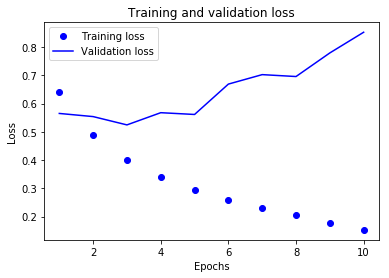

In [64]:
import matplotlib.pyplot as plt

epochs = range(1, len(history.history['loss']) + 1)
plt.plot(epochs, history.history['loss'], 'bo', label='Training loss')
plt.plot(epochs, history.history['val_loss'], 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [67]:
history.history.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

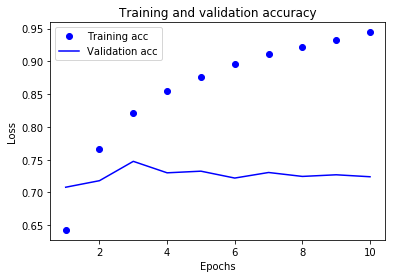

In [68]:
acc = history.history['acc']
val_acc = history.history['val_acc']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()